In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('reviews.csv', names=['Game_ID', 'Num_Helpful', 'Num_Funny', 'Username', 'Num_Games_Owned', 'Num_Reviews_Written', 'Recommend', 'Hours_Played', 'Date_of_Review', 'Review_Text'])

In [3]:
dataset.head()

,Game_ID,Num_Helpful,Num_Funny,Username,Num_Games_Owned,Num_Reviews_Written,Recommend,Hours_Played,Date_of_Review,Review_Text
0,1444480,0,0,ltlmanandy,77,1,1,16.1,"November 1, 2021",If you are at all interested in Computer Scien...
1,1444480,0,0,chigbarg,245,7,1,0.6,"November 1, 2021","Huge potential, but definitely an early access..."
2,1444480,0,0,76561198119150554,50,2,1,7.4,"November 1, 2021",computer go beep boop
3,1444480,1,0,gamseb,352,18,1,2.5,"October 31, 2021","A game made with Godot and written with Nim, I..."
4,1444480,0,0,Hadopire,267,2,1,55.9,"October 31, 2021",fun


In [4]:
dataset.columns

Index(['Game_ID', 'Num_Helpful', 'Num_Funny', 'Username', 'Num_Games_Owned',
       'Num_Reviews_Written', 'Recommend', 'Hours_Played', 'Date_of_Review',
       'Review_Text'],
      dtype='object')

In [5]:
# clean up uneeded columns
dataset.drop(labels = ['Game_ID', 'Username', 'Num_Games_Owned', 'Num_Reviews_Written'], axis=1, inplace=True)

In [6]:
dataset.head()

,Num_Helpful,Num_Funny,Recommend,Hours_Played,Date_of_Review,Review_Text
0,0,0,1,16.1,"November 1, 2021",If you are at all interested in Computer Scien...
1,0,0,1,0.6,"November 1, 2021","Huge potential, but definitely an early access..."
2,0,0,1,7.4,"November 1, 2021",computer go beep boop
3,1,0,1,2.5,"October 31, 2021","A game made with Godot and written with Nim, I..."
4,0,0,1,55.9,"October 31, 2021",fun


In [7]:
print(dataset.dtypes)

Num_Helpful         int64
Num_Funny           int64
Recommend           int64
Hours_Played      float64
Date_of_Review     object
Review_Text        object
dtype: object


In [8]:
# organize the columns so it would be easier to sort the features vs the output
df = dataset[['Date_of_Review', 'Review_Text', 'Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend']]
df.head(20)

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend
0,"November 1, 2021",If you are at all interested in Computer Scien...,0,0,16.1,1
1,"November 1, 2021","Huge potential, but definitely an early access...",0,0,0.6,1
2,"November 1, 2021",computer go beep boop,0,0,7.4,1
3,"October 31, 2021","A game made with Godot and written with Nim, I...",1,0,2.5,1
4,"October 31, 2021",fun,0,0,55.9,1
5,"October 31, 2021",Easy steps lead to building a fully functional...,0,0,13.5,1
6,"October 31, 2021",A really cool way to learn low -level stuff,0,0,6.8,1
7,"October 30, 2021","Still has some rough edges, but very entertain...",0,0,45.6,1
8,"October 30, 2021",♥♥♥♥ dark souls,0,0,8.3,1
9,"October 30, 2021",Already I can see this evolving into a great p...,0,0,5.5,1


In [9]:
df.columns

Index(['Date_of_Review', 'Review_Text', 'Num_Helpful', 'Num_Funny',
       'Hours_Played', 'Recommend'],
      dtype='object')

# Convert date to datetime format

In [10]:
import datetime as dt

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date_of_Review  244 non-null    object 
 1   Review_Text     243 non-null    object 
 2   Num_Helpful     244 non-null    int64  
 3   Num_Funny       244 non-null    int64  
 4   Hours_Played    244 non-null    float64
 5   Recommend       244 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 11.6+ KB


In [12]:
# change date to unix datetime
dates = pd.to_datetime(df['Date_of_Review'])

# calculate unix datetime starting from 01-01-1970
df['Date_Epoch'] = (dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

df.head()

C:\Users\anqiz\AppData\Local\Temp/ipykernel_19616/3723366679.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_Epoch'] = (dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')


,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch
0,"November 1, 2021",If you are at all interested in Computer Scien...,0,0,16.1,1,1635724800
1,"November 1, 2021","Huge potential, but definitely an early access...",0,0,0.6,1,1635724800
2,"November 1, 2021",computer go beep boop,0,0,7.4,1,1635724800
3,"October 31, 2021","A game made with Godot and written with Nim, I...",1,0,2.5,1,1635638400
4,"October 31, 2021",fun,0,0,55.9,1,1635638400


In [13]:
# change the epoch time from total number of seconds into week number since(take the Date_Epoch and mod (b/c we want integers only) by num_secs_week = 7day/wk * 24hr/day * 60min/hr * 60sec/min = 604800)

df['Date_Epoch_Week'] = df['Date_Epoch'] // 604800

df.head()

C:\Users\anqiz\AppData\Local\Temp/ipykernel_19616/3335926905.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_Epoch_Week'] = df['Date_Epoch'] // 604800


,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"November 1, 2021",If you are at all interested in Computer Scien...,0,0,16.1,1,1635724800,2704
1,"November 1, 2021","Huge potential, but definitely an early access...",0,0,0.6,1,1635724800,2704
2,"November 1, 2021",computer go beep boop,0,0,7.4,1,1635724800,2704
3,"October 31, 2021","A game made with Godot and written with Nim, I...",1,0,2.5,1,1635638400,2704
4,"October 31, 2021",fun,0,0,55.9,1,1635638400,2704


In [14]:
df.sort_values(by=['Date_Epoch_Week'],ascending=True).groupby('Date_Epoch_Week')
df.head()

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"November 1, 2021",If you are at all interested in Computer Scien...,0,0,16.1,1,1635724800,2704
1,"November 1, 2021","Huge potential, but definitely an early access...",0,0,0.6,1,1635724800,2704
2,"November 1, 2021",computer go beep boop,0,0,7.4,1,1635724800,2704
3,"October 31, 2021","A game made with Godot and written with Nim, I...",1,0,2.5,1,1635638400,2704
4,"October 31, 2021",fun,0,0,55.9,1,1635638400,2704


## - Data Aggregation -

### Number of text reviews per day:

In [15]:
# reindex gets the columns needed
df_text = df.reindex(['Date_Epoch_Week','Date_of_Review', 'Review_Text'], axis=1)
df_text.head()
# formats to year-month datetime format
# df_text['Year_Month'] = pd.to_datetime(df_text['Year_Month'], format="%Y/%m")

,Date_Epoch_Week,Date_of_Review,Review_Text
0,2704,"November 1, 2021",If you are at all interested in Computer Scien...
1,2704,"November 1, 2021","Huge potential, but definitely an early access..."
2,2704,"November 1, 2021",computer go beep boop
3,2704,"October 31, 2021","A game made with Godot and written with Nim, I..."
4,2704,"October 31, 2021",fun


In [16]:

# groupby counts the total number of reviews per day
text_days = df_text.groupby(['Date_Epoch_Week', 'Date_of_Review']).size().reset_index().rename(columns={0: 'review_count'})
text_days

,Date_Epoch_Week,Date_of_Review,review_count
0,2700,"October 2, 2021",12
1,2700,"October 3, 2021",18
2,2700,"October 4, 2021",12
3,2700,"October 5, 2021",26
4,2700,"October 6, 2021",17
5,2701,"October 10, 2021",12
6,2701,"October 11, 2021",8
7,2701,"October 12, 2021",9
8,2701,"October 13, 2021",5
9,2701,"October 7, 2021",8


<AxesSubplot:>

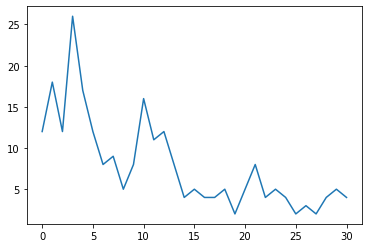

In [17]:
text_days['review_count'].plot()

In [18]:
# total number of text reviews
text_days['review_count'].sum()

244

In [19]:
# average number of text reviews per day
text_days['review_count'].mean()

7.870967741935484

### Number of text reviews per week:

In [20]:
df_text = df.reindex(['Date_Epoch_Week','Review_Text'], axis=1)
text_weeks = df_text.groupby('Date_Epoch_Week').size().reset_index().rename(columns={0: 'review_count'})
text_weeks

,Date_Epoch_Week,review_count
0,2700,85
1,2701,69
2,2702,42
3,2703,30
4,2704,18


<AxesSubplot:>

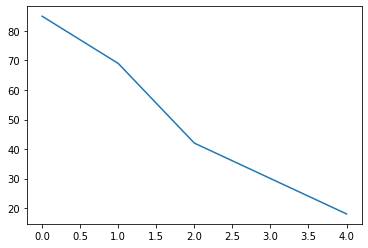

In [21]:
text_weeks['review_count'].plot()

In [22]:
# total number of text reviews
text_weeks['review_count'].sum()

244

In [23]:
# average number of text reviews per week
text_weeks['review_count'].mean()

48.8

### Num_Helpful per week:

In [24]:
df.head()

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"November 1, 2021",If you are at all interested in Computer Scien...,0,0,16.1,1,1635724800,2704
1,"November 1, 2021","Huge potential, but definitely an early access...",0,0,0.6,1,1635724800,2704
2,"November 1, 2021",computer go beep boop,0,0,7.4,1,1635724800,2704
3,"October 31, 2021","A game made with Godot and written with Nim, I...",1,0,2.5,1,1635638400,2704
4,"October 31, 2021",fun,0,0,55.9,1,1635638400,2704


In [25]:
df_helpful = df.reindex(['Date_Epoch_Week', 'Num_Helpful'], axis=1)
# total num of helpful votes per month (but keep in mind that helpful votes are for 1 review at a time)
df_helpful.groupby('Date_Epoch_Week').Num_Helpful.sum().reset_index().rename(columns={0: 'helpful_count'})


,Date_Epoch_Week,Num_Helpful
0,2700,294
1,2701,188
2,2702,103
3,2703,32
4,2704,5


In [26]:
df_helpful.groupby('Date_Epoch_Week').Num_Helpful.agg(['max', 'min', 'median', 'mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2700,189,0,0.0,3.458824
2701,56,0,0.0,2.724638
2702,43,0,0.5,2.452381
2703,7,0,1.0,1.066667
2704,2,0,0.0,0.277778


In [27]:
# total number of helpful votes of all users for all text reviews combined
df_helpful['Num_Helpful'].sum()

622

In [28]:
# average number of helpful votes on all reviews by all users
df_helpful['Num_Helpful'].mean()

2.5491803278688523

### Num_Funny per week:

In [29]:
df_funny = df.reindex(['Date_Epoch_Week', 'Num_Funny'], axis=1)
# total num of helpful votes per month (but keep in mind that helpful votes are for 1 review at a time)
df_funny.groupby('Date_Epoch_Week').Num_Funny.sum().reset_index().rename(columns={0: 'funny_count'})

,Date_Epoch_Week,Num_Funny
0,2700,9
1,2701,2
2,2702,67
3,2703,3
4,2704,0


In [30]:
df_funny.groupby('Date_Epoch_Week').Num_Funny.agg(['max', 'min', 'median', 'mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2700,8,0,0.0,0.105882
2701,1,0,0.0,0.028986
2702,59,0,0.0,1.595238
2703,1,0,0.0,0.100000
2704,0,0,0.0,0.000000


In [31]:
# total number of funny votes of all users for all text reviews combined
df_funny['Num_Funny'].sum()

81

In [32]:
# average number of funny votes on all reviews by all users
df_funny['Num_Funny'].mean()

0.3319672131147541

### Hours_Played per week:

In [33]:
df_hrs_plyd = df.reindex(['Date_Epoch_Week','Hours_Played'], axis=1)

# total num of hours played of the game for each month for all reviewers
df_hrs_plyd.groupby('Date_Epoch_Week').Hours_Played.sum().reset_index().rename(columns={0: 'hrs_pld_count'})

,Date_Epoch_Week,Hours_Played
0,2700,1605.4
1,2701,2121.2
2,2702,1038.6
3,2703,798.8
4,2704,303.8


In [34]:
df_hrs_plyd.groupby('Date_Epoch_Week').Hours_Played.agg(['max','min','median','mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2700,63.9,0.2,15.70,18.887059
2701,163.2,1.2,17.50,30.742029
2702,136.3,1.4,19.85,24.728571
2703,119.8,1.5,13.95,26.626667
2704,55.9,0.3,7.85,16.877778


In [35]:
# total number of hours played of the game by all users
df_hrs_plyd['Hours_Played'].sum()

5867.800000000001

In [36]:
# average number of hours played of the game by all users
df_hrs_plyd['Hours_Played'].mean()

24.048360655737707

### Recommend per week:

In [37]:
df_recmd = df.reindex(['Date_Epoch_Week','Recommend'], axis=1)

# avgerage number of reviewers recommended(1) + not recommended(-1) the game after writing the review for each week
df_recmd.groupby('Date_Epoch_Week',).Recommend.mean().reset_index().rename(columns={0: 'recmd_count'})

,Date_Epoch_Week,Recommend
0,2700,0.741176
1,2701,0.797101
2,2702,0.857143
3,2703,0.866667
4,2704,0.888889


In [38]:
df_recmd.groupby('Date_Epoch_Week').Recommend.agg(['max','min','median','mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2700,1,-1,1.0,0.741176
2701,1,-1,1.0,0.797101
2702,1,-1,1.0,0.857143
2703,1,-1,1.0,0.866667
2704,1,-1,1.0,0.888889


In [39]:
# total number of users who recommend the game
df_recmd['Recommend'].sum()

196

In [40]:
# average score of recommend/not recommend by all users
df_recmd['Recommend'].mean()

0.8032786885245902

## Feature Scaling - Min-Max Normalization

In [41]:
df_min_max_scaled = df.copy()

In [42]:
df_min_max_scaled.head()

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"November 1, 2021",If you are at all interested in Computer Scien...,0,0,16.1,1,1635724800,2704
1,"November 1, 2021","Huge potential, but definitely an early access...",0,0,0.6,1,1635724800,2704
2,"November 1, 2021",computer go beep boop,0,0,7.4,1,1635724800,2704
3,"October 31, 2021","A game made with Godot and written with Nim, I...",1,0,2.5,1,1635638400,2704
4,"October 31, 2021",fun,0,0,55.9,1,1635638400,2704


In [43]:
#df_min_max_scaled['Num_Helpful'] = (df_min_max_scaled['Num_Helpful'] - df_min_max_scaled['Num_Helpful'].min()) / (df_min_max_scaled['Num_Helpful'].max() - df_min_max_scaled['Num_Helpful'].min())
#df_min_max_scaled['Hours_Played'] = (df_min_max_scaled['Hours_Played'] - df_min_max_scaled['Hours_Played'].min()) / (df_min_max_scaled['Hours_Played'].max() - df_min_max_scaled['Hours_Played'].min()) 
df_min_max_scaled['Hours_Played'] = (df_min_max_scaled['Hours_Played'] - df_min_max_scaled['Hours_Played'].min()) / (df_min_max_scaled['Hours_Played'].max() - df_min_max_scaled['Hours_Played'].min()) 
df_min_max_scaled['Recommend'] = (df_min_max_scaled['Recommend'] - df_min_max_scaled['Recommend'].min()) / (df_min_max_scaled['Recommend'].max() - df_min_max_scaled['Recommend'].min()) 
df_min_max_scaled['Date_Epoch'] = (df_min_max_scaled['Date_Epoch'] - df_min_max_scaled['Date_Epoch'].min()) / (df_min_max_scaled['Date_Epoch'].max() - df_min_max_scaled['Date_Epoch'].min()) 
#df_min_max_scaled['Date_Epoch_Week'] = (df_min_max_scaled['Date_Epoch_Week'] - df_min_max_scaled['Date_Epoch_Week'].min()) / (df_min_max_scaled['Date_Epoch_Week'].max() - df_min_max_scaled['Date_Epoch_Week'].min()) 

display(df_min_max_scaled)

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"November 1, 2021",If you are at all interested in Computer Scien...,0,0,0.097546,1.0,1.000000,2704
1,"November 1, 2021","Huge potential, but definitely an early access...",0,0,0.002454,1.0,1.000000,2704
2,"November 1, 2021",computer go beep boop,0,0,0.044172,1.0,1.000000,2704
3,"October 31, 2021","A game made with Godot and written with Nim, I...",1,0,0.014110,1.0,0.966667,2704
4,"October 31, 2021",fun,0,0,0.341718,1.0,0.966667,2704
...,...,...,...,...,...,...,...,...
239,"October 5, 2021","I got stuck ion the invaders game, because fir...",0,0,0.027607,0.0,0.100000,2700
240,"October 5, 2021",This game is the king of logic gate games. Not...,0,0,0.060736,1.0,0.100000,2700
241,"October 5, 2021","Amazing, educational and enjoyable game. Look...",0,0,0.087117,1.0,0.100000,2700
242,"October 5, 2021",The price is fair for what the game is. There ...,0,0,0.117791,1.0,0.100000,2700


In [44]:
df_sorted = df_min_max_scaled.sort_values(by='Date_Epoch', ascending=False)

In [45]:
pd.set_option('display.max_rows', None)

In [46]:
df_sorted = df_sorted.reset_index(drop=True)

In [47]:
# drop all n/a data
clean_df=df.drop(df[df['Review_Text'].isna()].index, inplace=True)
cat_df=df.drop(df[df['Recommend'].isna()].index, inplace=True)

C:\Users\anqiz\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [48]:
# delete Chinese characters in text reviews
df_sorted['Review_Text'] = df_sorted['Review_Text'].str.replace(r'[^\x00-\x7F]+', '')

C:\Users\anqiz\AppData\Local\Temp/ipykernel_19616/2491715762.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_sorted['Review_Text'] = df_sorted['Review_Text'].str.replace(r'[^\x00-\x7F]+', '')


In [49]:
df_sorted

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"November 1, 2021",If you are at all interested in Computer Scien...,0,0,0.097546,1.0,1.000000,2704
1,"November 1, 2021",computer go beep boop,0,0,0.044172,1.0,1.000000,2704
2,"November 1, 2021","Huge potential, but definitely an early access...",0,0,0.002454,1.0,1.000000,2704
3,"October 31, 2021","A game made with Godot and written with Nim, I...",1,0,0.014110,1.0,0.966667,2704
4,"October 31, 2021",fun,0,0,0.341718,1.0,0.966667,2704
5,"October 31, 2021",Easy steps lead to building a fully functional...,0,0,0.081595,1.0,0.966667,2704
6,"October 31, 2021",A really cool way to learn low -level stuff,0,0,0.040491,1.0,0.966667,2704
7,"October 30, 2021",Already I can see this evolving into a great p...,0,0,0.032515,1.0,0.933333,2704
8,"October 30, 2021",this game crashes randomly A LOT. Very disappo...,0,0,0.000613,0.0,0.933333,2704
9,"October 30, 2021","There is a saying, which I think perfectly des...",2,0,0.085890,1.0,0.933333,2704


In [50]:
# sorted review text
df_text_list = df_sorted.groupby('Date_Epoch_Week')['Review_Text'].apply(list) # save separately as json file

In [51]:
df_text_list

Date_Epoch_Week
2700    [If you ever wanted to build a full turing-com...
2701    [It pains me to say, this is one on which to w...
2702    [After playing for 4 hours, @Whoat's review is...
2703    [Needs better hints a tutorials to allow for b...
2704    [If you are at all interested in Computer Scie...
Name: Review_Text, dtype: object

In [52]:
# storing data in JSON format
df_text_list.to_json('turingcom_text.json', orient = 'split', compression = 'infer')

In [53]:
# reading the JSON file
game_text = pd.read_json('turingcom_text.json')
print(game_text)

          name  index                                               data
0  Review_Text   2700  [If you ever wanted to build a full turing-com...
1  Review_Text   2701  [It pains me to say, this is one on which to w...
2  Review_Text   2702  [After playing for 4 hours, @Whoat's review is...
3  Review_Text   2703  [Needs better hints a tutorials to allow for b...
4  Review_Text   2704  [If you are at all interested in Computer Scie...


In [54]:
# mean of other columns; save as csv file
mean_per_week = df_sorted.groupby('Date_Epoch_Week')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for weekly
mean_per_week.to_csv('turingcom_mean_week.csv')

C:\Users\anqiz\AppData\Local\Temp/ipykernel_19616/1518916538.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_per_week = df_sorted.groupby('Date_Epoch_Week')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for weekly


In [55]:
mean_day = df_sorted.groupby('Date_Epoch')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for daily
mean_day.to_csv('turingcom_mean_day.csv')

C:\Users\anqiz\AppData\Local\Temp/ipykernel_19616/681533247.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_day = df_sorted.groupby('Date_Epoch')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for daily


In [56]:
# storing data in CSV format
game_review = df_sorted.to_csv('turingcom_review.csv', columns=['Date_Epoch_Week', 'Review_Text'])